In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling

sns.set(context='notebook', style='ticks')

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr_frozen_09272019.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
lsl_dr.shape

(65064, 246)

Exclusions

In [4]:
other_etiology = (lsl_dr[['etiology_3___2', 'etiology_3___4', 'etiology_3___5', 'etiology_3___6', 'etiology_3___9',
       'etiology_oth___1', 'etiology_oth___3', 'etiology_oth___4', 'etiology_oth___8', 'etiology_oth___9']]
                      .sum(1).astype(bool))

In [5]:
inclusion_mask = (~lsl_dr.non_english.astype(bool) 
                  & ((lsl_dr.autism==1)))

In [6]:
autism_subset = lsl_dr[inclusion_mask]
autism_subset.drop_duplicates(subset='study_id').shape

(67, 246)

## Demographics

In [7]:
autism_subset.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      228
Female     72
Name: male, dtype: int64

In [8]:
autism_subset.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       202
Other        38
Black        37
Hispanic      9
Asian         8
Missing       6
Name: race, dtype: int64

In [9]:
(autism_subset.premature_age.replace({9:None})==8).replace({True: '>=36 weeks', False: '<36 weeks', 
                                                            np.nan: 'Unknown'}).value_counts()

>=36 weeks    236
<36 weeks      64
Name: premature_age, dtype: int64

In [10]:
autism_subset.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1           88
2          117
3           55
4+          13
Missing     27
Name: sib, dtype: int64

In [11]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

autism_subset.mother_ed.replace(ed_lookup).value_counts()

High school diploma/GED    139
Unknown                     62
Some college                54
Some high school            45
Name: mother_ed, dtype: int64

In [12]:
autism_subset.father_ed.replace(ed_lookup).value_counts()

Bachelor's degree          86
Unknown                    74
Post graduate degree       67
Some college               45
High school diploma/GED    28
Name: father_ed, dtype: int64

In [13]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

autism_subset.family_inv.replace(family_lookup).value_counts()

Ideal Participation      123
Average Participation     83
Missing                   49
Good Participation        37
Below Average              8
Name: family_inv, dtype: int64

In [14]:
autism_subset[["age_diag", "age_amp", "age_int", "age"]].describe()

,age_diag,age_amp,age_int,age
count,146.000000,142.000000,191.000000,297.000000
mean,15.767123,20.204225,24.989529,46.993266
std,18.262092,18.261512,19.596989,26.528668
min,0.000000,1.000000,1.000000,1.000000
25%,1.000000,3.250000,10.000000,30.000000
50%,10.000000,19.000000,23.000000,44.000000
75%,21.000000,27.000000,36.000000,65.000000
max,83.000000,83.000000,83.000000,141.000000


In [15]:
autism_subset.otherserv.replace({0: "OPTION + outside", 1: "OPTION only", 2: "Missing"}).value_counts()

OPTION + outside    121
OPTION only          80
Missing               8
Name: otherserv, dtype: int64

## Hearing loss

In [16]:
autism_subset.degree_hl_ad.isnull().sum()

90

In [17]:
autism_subset.degree_hl_as.isnull().sum()

90

In [18]:
autism_subset.degree_hl_ad.value_counts()

6.0    84
0.0    64
3.0    23
4.0    13
5.0    13
1.0     8
2.0     5
Name: degree_hl_ad, dtype: int64

In [19]:
autism_subset.degree_hl_as.value_counts()

0.0    73
6.0    72
3.0    22
5.0    18
2.0    16
4.0     7
1.0     2
Name: degree_hl_as, dtype: int64

In [20]:
hl_data = autism_subset.set_index('study_id')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [21]:
autism_subset.one_or_both_parent_hl.value_counts()

0.0    251
1.0     12
Name: one_or_both_parent_hl, dtype: int64

In [22]:
autism_subset.one_or_both_parent_hl.isnull().sum()

37

Individuals with no hearing loss type

In [23]:
hl_data[hl_data.sum(1)==0].index.values

array(['0416-2012-8486', '0416-2012-8486', '0416-2012-8486',
       '0416-2012-8486', '0416-2012-8486', '0416-2012-8486',
       '0735-2011-0006', '0735-2011-0006', '0735-2011-0006',
       '0735-2011-0006', '0735-2011-0006', '0411-2012-0006',
       '0411-2012-0006', '0411-2012-0006', '0411-2012-0017',
       '0411-2012-0017', '0411-2011-0035', '0411-2011-0035',
       '0411-2011-0035', '0414-2015-0024', '0414-2015-0024',
       '0414-2015-0024', '0414-2015-0024', '0414-2015-0024',
       '0411-2012-0035', '0411-2012-0035', '0411-2012-0035',
       '0411-2013-0006', '0411-2013-0006', '0411-2013-0006',
       '0411-2013-0004', '0411-2013-0004', '0411-2013-0004',
       '0414-2017-0020', '0414-2017-0020', '0414-2017-0020',
       '0414-2017-0020', '0414-2017-0020', '0414-2017-0023',
       '0414-2017-0023', '0414-2017-0023', '0414-2017-0023',
       '0414-2017-0023', '0414-2014-0267', '0414-2014-0267',
       '0414-2014-0267', '0414-2014-0267', '0414-2014-0267',
       '0414-2014-0267',

In [24]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      133
bilateral_normal     64
unilateral_snhl       6
unilateral_mixed      3
assymetrical          2
bilateral_mixed       2
unilateral_unk        0
unilateral_cond       0
unilateral_ansd       0
bilateral_unk         0
bilateral_cond        0
bilateral_ansd        0
dtype: int64

In [25]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.44
bilateral_normal    0.21
unilateral_snhl     0.02
assymetrical        0.01
unilateral_mixed    0.01
bilateral_mixed     0.01
unilateral_unk      0.00
unilateral_cond     0.00
unilateral_ansd     0.00
bilateral_unk       0.00
bilateral_cond      0.00
bilateral_ansd      0.00
dtype: float64

In [26]:
tech_data = autism_subset.set_index('study_id')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [27]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        190
bilateral_ha         20
unilateral_ci        14
bimodal              10
unilateral_other      0
unilateral_ha         0
bilateral_other       0
dtype: int64

In [28]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.63
bilateral_ha        0.07
unilateral_ci       0.05
bimodal             0.03
unilateral_other    0.00
unilateral_ha       0.00
bilateral_other     0.00
dtype: float64

Individuals with no technology type

In [29]:
tech_data[tech_data.sum(1)==0].index.values

array(['0735-2019-0020', '0735-2019-0020', '0414-2011-0180',
       '0414-2011-0180', '0414-2011-0180', '0414-2011-0180',
       '0414-2009-0079', '0414-2009-0079', '0414-2009-0079',
       '0414-2009-0079', '0414-2009-0079', '0414-2009-0079',
       '0414-2009-0041', '0414-2009-0041', '0414-2009-0041',
       '0414-2009-0041', '0414-2009-0041', '0414-2009-0041',
       '0414-2009-0056', '0414-2009-0056', '0414-2009-0056',
       '0414-2009-0056', '0414-2009-0056', '0414-2009-0056',
       '0414-2012-0228', '0414-2012-0228', '0414-2012-0228',
       '0414-2012-0228', '0414-2012-0228', '0414-2012-0228',
       '0414-2012-0229', '0414-2012-0229', '0414-2012-0229',
       '0414-2012-0229', '0414-2012-0229', '0414-2012-0229',
       '0414-2011-0153', '0414-2011-0153', '0414-2011-0153',
       '0414-2011-0153', '0414-2011-0153', '0414-2011-0153',
       '0414-2011-0155', '0414-2011-0155', '0414-2011-0155',
       '0414-2011-0155', '0414-2011-0155', '0414-2011-0155',
       '0414-2011-0154',

## Hearing Loss

In [30]:
autism_subset.columns[autism_subset.columns.str.contains('_hl_')]

Index(['degree_hl_ad', 'type_hl_ad', 'degree_hl_as', 'type_hl_as',
       'bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound'],
      dtype='object')

In [31]:
hl_data = autism_subset.set_index('study_id')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [32]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_profound     69
bilateral_hl_normal       64
bilateral_hl_moderate     14
bilateral_hl_severe       13
unilateral_hl_modsev       9
bilateral_hl_mild          3
bilateral_hl_slight        2
unilateral_hl_profound     0
unilateral_hl_severe       0
unilateral_hl_moderate     0
unilateral_hl_mild         0
unilateral_hl_slight       0
bilateral_hl_modsev        0
dtype: int64

In [33]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_profound     0.23
bilateral_hl_normal       0.21
bilateral_hl_moderate     0.05
bilateral_hl_severe       0.04
unilateral_hl_modsev      0.03
bilateral_hl_mild         0.01
bilateral_hl_slight       0.01
unilateral_hl_profound    0.00
unilateral_hl_severe      0.00
unilateral_hl_moderate    0.00
unilateral_hl_mild        0.00
unilateral_hl_slight      0.00
bilateral_hl_modsev       0.00
dtype: float64

Missing one or both hearing loss values (left/right)

In [34]:
(autism_subset[['degree_hl_ad', 'degree_hl_as']].isnull().sum(1) > 0).sum()

90

## Summary of scores by domain

In [35]:
test_scores = lsl_dr[inclusion_mask].copy()

In [36]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [37]:
test_scores.groupby('domain').score.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,33.0,78.9,22.0,39.0,59.0,83.0,97.0,110.0
Expressive Language,54.0,69.8,18.3,42.0,57.0,65.0,80.8,115.0
Expressive Vocabulary,52.0,81.8,20.4,20.0,70.8,80.0,98.0,125.0
Language,53.0,68.3,19.7,42.0,54.0,62.0,79.0,129.0
Receptive Language,53.0,70.6,19.7,46.0,57.0,65.0,79.0,140.0
Receptive Vocabulary,55.0,80.7,20.8,34.0,69.0,79.0,93.0,141.0


In [38]:
test_scores.domain.unique()

array(['Expressive Vocabulary', 'Receptive Vocabulary',
       'Receptive Language', 'Expressive Language', 'Language',
       'Articulation'], dtype=object)

In [39]:
test_scores['domain_labels'] = test_scores.domain.replace({'Expressive Vocabulary': 'Expressive\nVocabulary', 
                                                           'Receptive Vocabulary': 'Receptive\nVocabulary',
                                                           'Receptive Language': 'Receptive\nLanguage', 
                                                           'Expressive Language': 'Expressive\nLanguage', 
                                                           'Language': 'Total\nLanguage'})

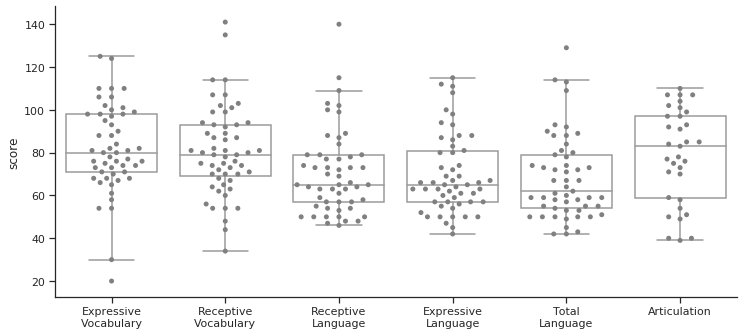

In [40]:
sns.catplot("domain_labels", y="score", data=test_scores, kind="box", color='white', fliersize=0)
sns.swarmplot("domain_labels", y="score", data=test_scores, color='grey')
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

## Domain-specific summaries

Age of amplification greater than 6mo.

In [41]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_amp_greater_6                                      
Articulation          False               27.0  78.481481  23.542711  39.0   
                      True                 6.0  80.833333  14.330620  58.0   
Expressive Language   False               34.0  72.029412  19.011138  42.0   
                      True                20.0  66.100000  16.945423  50.0   
Expressive Vocabulary False               37.0  84.216216  18.857853  30.0   
                      True                15.0  75.666667  23.457154  20.0   
Language              False               34.0  70.764706  20.970483  42.0   
                      True                19.0  63.894737  16.785889  45.0   
Receptive Language    False               34.0  73.794118  22.142485  47.0   
                      True                19.0  65.000000  13.017083  46.0   
Receptive Vocabulary  False               39.0  83.282051  20.799733  44.0   
                      True                16.0  74.500000  20.016660  34.0   

                                           25%   50%    75%    max  
domain                age_amp_greater_6                             
Articulation          False              56.50  83.0  98.00  110.0  
                      True               77.25  81.5  85.00  102.0  
Expressive Language   False              59.25  66.5  82.50  115.0  
                      True               54.25  63.0  69.00  112.0  
Expressive Vocabulary False              74.00  81.0  98.00  125.0  
                      True               64.50  73.0  94.00  110.0  
Language              False              55.00  69.5  83.00  129.0  
                      True               52.00  59.0  69.00  113.0  
Receptive Language    False              57.00  71.0  86.25  140.0  
                      True               55.50  64.0  73.00  100.0  
Receptive Vocabulary  False              71.50  80.0  93.50  141.0  
                      True               62.75  72.5  86.25  107.0

Age of enrollment greater than 6mo.

In [42]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_enroll_greater_6                                      
Articulation          False                  18.0  74.500000  20.382374  39.0   
                      True                   15.0  84.200000  23.348906  40.0   
Expressive Language   False                  24.0  70.541667  20.265583  42.0   
                      True                   30.0  69.266667  16.976522  47.0   
Expressive Vocabulary False                  30.0  81.966667  20.962172  30.0   
                      True                   22.0  81.454545  20.165334  20.0   
Language              False                  24.0  69.333333  23.045638  42.0   
                      True                   29.0  67.448276  16.794102  42.0   
Receptive Language    False                  24.0  70.958333  22.982941  48.0   
                      True                   29.0  70.379310  16.922964  46.0   
Receptive Vocabulary  False                  31.0  81.193548  22.720650  44.0   
                      True                   24.0  80.125000  18.442183  34.0   

                                              25%   50%     75%    max  
domain                age_enroll_greater_6                              
Articulation          False                 61.75  75.5   90.00  107.0  
                      True                  67.50  91.0  103.00  110.0  
Expressive Language   False                 57.00  64.5   80.25  115.0  
                      True                  57.50  65.0   82.25  112.0  
Expressive Vocabulary False                 68.75  76.5   98.50  125.0  
                      True                  71.50  82.0   97.25  110.0  
Language              False                 53.75  60.0   78.25  129.0  
                      True                  55.00  67.0   80.00  113.0  
Receptive Language    False                 54.50  65.5   75.00  140.0  
                      True                  59.00  65.0   79.00  115.0  
Receptive Vocabulary  False                 69.00  75.0   93.50  141.0  
                      True                  69.25  81.5   92.25  114.0

(Non-)Profound hearing loss

In [43]:
(test_scores.assign(profound_hl=test_scores.degree_hl==6)
         .groupby(['domain', 'profound_hl'])
         .score.describe())

count       mean        std   min    25%  \
domain                profound_hl                                             
Articulation          False         30.0  79.500000  22.349497  39.0  61.75   
                      True           3.0  73.000000  20.784610  49.0  67.00   
Expressive Language   False         35.0  68.828571  16.317594  45.0  57.00   
                      True          19.0  71.684211  21.949570  42.0  59.00   
Expressive Vocabulary False         39.0  83.282051  18.212125  30.0  73.00   
                      True          13.0  77.153846  26.324406  20.0  65.00   
Language              False         34.0  67.500000  16.731842  42.0  55.50   
                      True          19.0  69.736842  24.562487  42.0  53.00   
Receptive Language    False         34.0  70.911765  16.802539  47.0  57.25   
                      True          19.0  70.157895  24.549866  46.0  50.00   
Receptive Vocabulary  False         41.0  80.804878  17.326597  44.0  70.00   
                      True          14.0  80.500000  29.502933  34.0  65.50   

                                    50%    75%    max  
domain                profound_hl                      
Articulation          False        80.5  98.50  110.0  
                      True         85.0  85.00   85.0  
Expressive Language   False        65.0  80.50  112.0  
                      True         65.0  79.50  115.0  
Expressive Vocabulary False        81.0  98.00  125.0  
                      True         78.0  93.00  124.0  
Language              False        63.0  79.50  113.0  
                      True         60.0  76.00  129.0  
Receptive Language    False        65.5  78.75  115.0  
                      True         63.0  78.00  140.0  
Receptive Vocabulary  False        79.0  93.00  114.0  
                      True         75.5  86.75  141.0

Parent with(out) hearing loss

In [44]:
test_scores.loc[test_scores.parent_hearing_loss=='Unknown', 'parent_hearing_loss'] = np.nan
(test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss']))
         .groupby(['domain', 'parent_with_hl'])
         .score.describe())

count       mean        std   min  \
domain                parent_with_hl                                      
Articulation          False            31.0  78.064516  22.362074  39.0   
                      True              2.0  92.000000   9.899495  85.0   
Expressive Language   False            52.0  70.096154  18.643466  42.0   
                      True              2.0  63.000000   1.414214  62.0   
Expressive Vocabulary False            50.0  82.180000  20.625613  20.0   
                      True              2.0  71.000000  14.142136  61.0   
Language              False            51.0  68.725490  19.952021  42.0   
                      True              2.0  57.500000   3.535534  55.0   
Receptive Language    False            51.0  70.921569  20.026825  46.0   
                      True              2.0  63.500000   3.535534  61.0   
Receptive Vocabulary  False            53.0  81.283019  20.841321  34.0   
                      True              2.0  66.000000  16.970563  54.0   

                                        25%   50%    75%    max  
domain                parent_with_hl                             
Articulation          False           58.50  78.0  97.00  110.0  
                      True            88.50  92.0  95.50   99.0  
Expressive Language   False           57.00  65.5  81.50  115.0  
                      True            62.50  63.0  63.50   64.0  
Expressive Vocabulary False           71.00  80.0  98.00  125.0  
                      True            66.00  71.0  76.00   81.0  
Language              False           53.50  64.0  79.50  129.0  
                      True            56.25  57.5  58.75   60.0  
Receptive Language    False           56.00  65.0  79.00  140.0  
                      True            62.25  63.5  64.75   66.0  
Receptive Vocabulary  False           70.00  80.0  93.00  141.0  
                      True            60.00  66.0  72.00   78.0

Mother with(out) college education

In [45]:
test_scores.groupby(['domain', 'mother_college']).score.describe()

count       mean        std   min  \
domain                mother_college                                      
Articulation          0.0              19.0  76.842105  23.137903  39.0   
                      1.0               7.0  93.857143  16.272969  70.0   
Expressive Language   0.0              34.0  66.500000  15.609341  42.0   
                      1.0              10.0  84.100000  17.590717  64.0   
Expressive Vocabulary 0.0              31.0  80.419355  18.978539  20.0   
                      1.0               8.0  92.125000  16.745468  61.0   
Language              0.0              33.0  65.575758  16.194193  42.0   
                      1.0              10.0  81.500000  20.200385  55.0   
Receptive Language    0.0              33.0  68.818182  16.830877  46.0   
                      1.0              10.0  80.600000  18.745073  50.0   
Receptive Vocabulary  0.0              34.0  79.705882  15.442031  34.0   
                      1.0               9.0  93.666667  25.199206  54.0   

                                        25%    50%     75%    max  
domain                mother_college                               
Articulation          0.0             56.00   83.0   97.00  107.0  
                      1.0             81.00  101.0  107.00  110.0  
Expressive Language   0.0             57.00   63.0   73.75  108.0  
                      1.0             68.25   84.0   91.75  112.0  
Expressive Vocabulary 0.0             73.00   80.0   90.50  125.0  
                      1.0             86.00   97.5  102.25  110.0  
Language              0.0             55.00   62.0   73.00  109.0  
                      1.0             66.50   79.5   88.00  114.0  
Receptive Language    0.0             57.00   66.0   74.00  115.0  
                      1.0             68.00   78.5   96.25  109.0  
Receptive Vocabulary  0.0             71.25   78.5   88.50  114.0  
                      1.0             87.00   99.0  103.00  135.0